In [4]:
#%matplotlib inline # make sure the plot appear on the jupyter
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
sst = xr.open_dataset('sst.mnmean.nc')
sst

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, time: 1994)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/30)
    history:                 created 10/2014 by CAS using NCDC's ERSST V4 asc...
    title:                   NOAA Extended Reconstructed Sea Surface Temperat...
    climatology:             Climatology is based on 1971-2000 SST, Xue, Y., ...
    description:             In situ data: ICOADS2.5 before 2007 and NCEP in ...
    citation:                Huang et al, 2014: Extended Reconstructed Sea Su...
    comment:                 SSTs were observed by conventional thermometers ...
    ...                      ...
    license:                 No constraints on data access or use
    original_publisher_url:  http://www.ncdc.noaa.gov
    dataset_title:           Extended Reconstructed Sea Surface Temperature (...
    Source:                  http://www.ncdc.noaa.gov/data-access/marineocean...
    data_modified:           2020-03-03
    References:              http://www.psl.noaa.gov/data/gridded/data.noaa.e...

In [6]:
#select position
nino = sst.sst.sel(lat=slice(5,-5), lon=slice(210, 270)) # the first sst is called above, the second one is variable name
nino

<xarray.DataArray 'sst' (time: 1994, lat: 5, lon: 31)>
[309070 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 210.0 212.0 214.0 216.0 ... 264.0 266.0 268.0 270.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-02-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

<xarray.DataArray 'sst' (time: 1994)>
array([-0.15579796, -0.2596016 , -0.7307644 , ...,  0.15210915,
       -0.10941124, -0.1125679 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-02-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 4 5 6 7 8 9 10 11 12 1 2

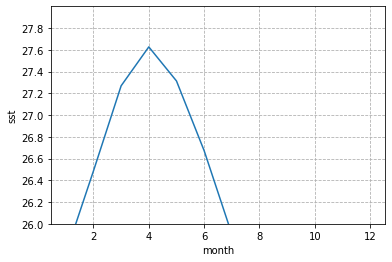

In [7]:
nino = nino.mean(dim=['lat', 'lon'])

nino_clim = nino.sel(time=slice("1986-01-01", "2015-12-31")).groupby("time.month").mean(dim='time')

fig,ax = plt.subplots()
nino_clim.plot(ax=ax)
ax.set_yticks(np.arange(20,28,0.2))
ax.set_ylim(26,28)
ax.grid(ls='--')
#calculate the anomalies
nino_anom = nino.groupby('time.month') - nino_clim
nino_anom

C:\ProgramData\Anacoda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  


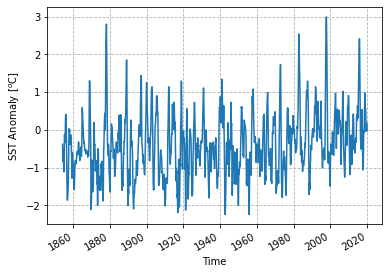

In [8]:
#Oceanic Niño Index
ONI = nino_anom.rolling(time=3, center=True).mean(dim='time')
#truncate_decimals: function that truncates a number to three decimal places
#works by first shifting the decimal point in the number n three places to the right 
#by multiplying n by 1000. The integer part of this new number is taken with int()
#Finally, the decimal point is shifted three places back to the left by dividing n by 1000
def truncate_decimals(xrobj, decimals=2): 
    return xr.apply_ufunc(np.around, xrobj, kwargs={'decimals':decimals})
ONI = truncate_decimals(ONI)
ONI.attrs['long_name'] = "SST Anomaly"
ONI.attrs['units'] = "$^o$C"
ONI.plot()
plt.grid(ls='--')
plt.show()

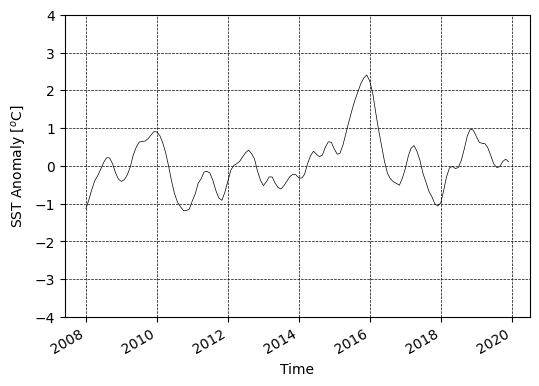

In [9]:
plot_data = ONI.sel(time=slice("2008-01-01","2019-12-31"))
fig, ax = plt.subplots(dpi=100)
plot_data.plot(ax=ax, c='k', lw=0.5)
ax.set_ylim(-4, 4)
ax.grid(ls='--',c='k', lw=0.5)

Populating the interactive namespace from numpy and matplotlib


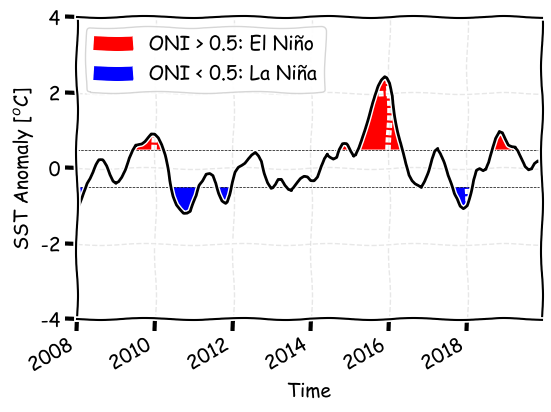

In [15]:
%pylab inline
plt.xkcd()

plot_data = ONI.sel(time=slice("2008-01-01","2019-12-31"))

fig, ax = plt.subplots(dpi=100)
ax.fill_between(plot_data.time.data,plot_data.data, 0.5, where = plot_data > 0.5, color='red', interpolate=True, lw=0, label="ONI > 0.5: El Niño")
ax.fill_between(plot_data.time.data,plot_data.data, -0.5, where = plot_data < -0.5, color='blue', interpolate=True, lw=0, label="ONI < 0.5: La Niña")
plot_data.plot(ax=ax, c='k')

minx = plot_data.time.min().data
maxx = plot_data.time.max().data
ax.hlines(0.5, minx, maxx, lw=0.5, linestyles='--', color ='black')
ax.hlines(-0.5, minx, maxx, lw=0.5, linestyles='--',color='black')

ax.set_ylim(-4, 4)
ax.set_xlim(minx, maxx)
ax.grid(ls='--',lw=1, alpha=0.3)
ax.legend()
plt.show()